<a href="https://colab.research.google.com/github/shokru/carbon_emissions/blob/main/gdp_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Economic output and temperature dynamics

In [6]:
import pandas as pd                      # This library is for data wrangling
import seaborn as sns                    # This is one library for plotting
import matplotlib.pyplot as plt          # Yet another library for visualization
import plotly.express as px              # This is another library for plots 
pd.set_option('display.max_rows', 6)     # First 3 and last 3 rows will be shown
import warnings                          # This is to remove warning to keep output clean
warnings.filterwarnings('ignore')

## Temperature data

First, let's download global annual temperatures from the NASA (see the page https://climate.nasa.gov/vital-signs/global-temperature/).  
The values related to the difference with pre-industrial periods.  
This is often taken to be 1850-1900, though it's unclear if this is the base choice in the NASA's data.

In [2]:
url = 'https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt'
data_temp = pd.read_csv(url, skiprows = 4, sep='\r\t')  
data_temp = data_temp.iloc[0:,0].str.split(expand = True)
data_temp = data_temp.rename(columns = {0: 'Year', 1: 'Temperature', 2: 'Smoothing'})
data_temp['Temperature'] = pd.to_numeric(data_temp['Temperature']) # Translate to number
data_temp['Smoothing'] = pd.to_numeric(data_temp['Smoothing'])     # Translate to number
data_temp['Year'] = pd.to_numeric(data_temp['Year'])               # Translate to number
data_temp

,Year,Temperature,Smoothing
0,1880,-0.16,-0.09
1,1881,-0.08,-0.12
2,1882,-0.10,-0.16
...,...,...,...
138,2018,0.85,0.94
139,2019,0.98,0.98
140,2020,1.02,1.01


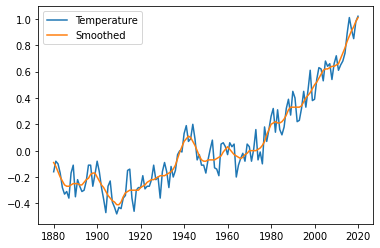

In [3]:
plt.plot(data_temp.Year, data_temp.Temperature, label = "Temperature")
plt.plot(data_temp.Year, data_temp.Smoothing, label = "Smoothed")
plt.legend()
plt.show()


The trend post-1960 seems pretty obvious (almost post-1900 if we omit World War II).

Next, GDP data from the **World Bank**.

In [4]:
url = 'https://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=excel'
data_gdp = pd.read_excel(url, skiprows = 3) 
# Putting the data in long format below
data_gdp = pd.wide_to_long(data_gdp.iloc[0:,0:65], 
                stubnames = [''], 
                i = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                j = 'Year').reset_index()
data_gdp = data_gdp.rename(columns = {'Country Name': 'Country', '': 'GDP'})
data_gdp

,Country,Country Code,Indicator Name,Indicator Code,Year,GDP
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
1,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1961,NaN
2,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1962,NaN
...,...,...,...,...,...,...
16223,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2018,1.952362e+10
16224,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2019,1.693243e+10
16225,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,2020,1.676851e+10


A quick look at all **geographical zones** included in the sample: lots of **clusters**!

In [7]:
data_gdp.Country.unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Alge

Since the temperature (from the NASA data) is measured worldwide, we need to focus. only on the **World** subcategory.

Finally, let's join the two.

In [9]:
temp_merge = data_temp.merge(data_gdp.query('Country == "World"'),
      left_on = 'Year', right_on = 'Year')
temp_merge

,Year,Temperature,Smoothing,Country,Country Code,Indicator Name,Indicator Code,GDP
0,1960,-0.03,0.03,World,WLD,GDP (current US$),NY.GDP.MKTP.CD,1.384628e+12
1,1961,0.06,0.01,World,WLD,GDP (current US$),NY.GDP.MKTP.CD,1.440342e+12
2,1962,0.03,-0.01,World,WLD,GDP (current US$),NY.GDP.MKTP.CD,1.545697e+12
...,...,...,...,...,...,...,...,...
58,2018,0.85,0.94,World,WLD,GDP (current US$),NY.GDP.MKTP.CD,8.634351e+13
59,2019,0.98,0.98,World,WLD,GDP (current US$),NY.GDP.MKTP.CD,8.760777e+13
60,2020,1.02,1.01,World,WLD,GDP (current US$),NY.GDP.MKTP.CD,8.470543e+13


Let's see how the trends compare from 1960 onwards.

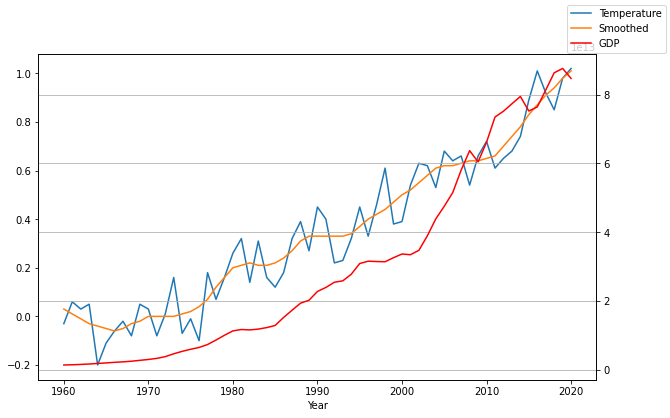

In [18]:
ax = temp_merge.plot(x = "Year", y = "Temperature", legend = False) 
plt.plot(data_temp.query('Year > 1959').Year, 
         data_temp.query('Year > 1959').Smoothing, 
         label = "Smoothed")
ax2 = ax.twinx()
temp_merge.plot(x = "Year", y = "GDP", ax = ax2, legend = False, color = "r")
ax.figure.legend()
plt.grid()
plt.show()
plt.rcParams["figure.figsize"]=(10, 6)

# Conclusion

Economic output and rising temperatures are **linked**. While our analysis is not sufficient to prove **causality**, there is strong consensus among the scientific community that global warming stems from human activity (even via cattle!).  
An important note: temperature is not the only relevant indicator. **Precipitation** (& humidity) is another facet of climate that is impacted by GHG emissions. The recent trends show extreme dynamics: dry places become drier and "wet" areas experience more and more intense rain episodes.